<a href="https://colab.research.google.com/github/RiniPaul86/Assignment_Decisiontree/blob/main/DecisiontreeA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Drugs A, B, C, X, Y for Decision Trees{Rini Paul}

####About Dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split


#import the decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

# for pre-processing
from sklearn import preprocessing

In [16]:
#import the datasets
drug = pd.read_csv("/content/drug200.csv")

In [17]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [18]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [19]:
drug['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [20]:
# use label encoder to convert drug into numbers

label_encoder = preprocessing.LabelEncoder()
drug['Sex'] = label_encoder.fit_transform(drug['Sex'])
drug['BP'] = label_encoder.fit_transform(drug['BP'])
drug['Cholesterol'] = label_encoder.fit_transform(drug['Cholesterol'])
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [21]:
drug.iloc[:,0:6]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [22]:
x = drug.iloc[:,0:5]
y = drug.iloc[:,5]

In [23]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [24]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [25]:
# Splitting the dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=44)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((140, 5), (60, 5), (140,), (60,))

####Building Decision Tree Classifier using Entropy as a Criterion


In [27]:
model =  DecisionTreeClassifier(criterion='entropy',max_depth = 4)

model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

####Plot the Decsion Tree

[Text(0.625, 0.9, 'x[4] <= 14.829\nentropy = 1.907\nsamples = 140\nvalue = [18, 8, 12, 32, 70]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.814\nsamples = 70\nvalue = [18, 8, 12, 32, 0]'),
 Text(0.25, 0.5, 'x[0] <= 53.0\nentropy = 0.89\nsamples = 26\nvalue = [18, 8, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.845\nsamples = 44\nvalue = [0, 0, 12, 32, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 0.985\nsamples = 21\nvalue = [0, 0, 12, 9, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 70\nvalue = [0, 0, 0, 0, 70]')]

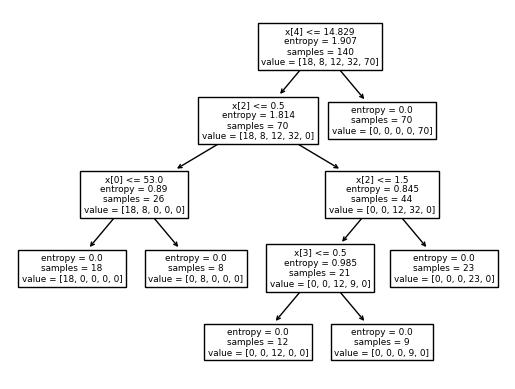

In [28]:
tree.plot_tree(model)

[Text(0.625, 0.9, 'Na_to_K <= 14.829\nentropy = 1.907\nsamples = 140\nvalue = [18, 8, 12, 32, 70]\nclass = drugB'),
 Text(0.5, 0.7, 'BP <= 0.5\nentropy = 1.814\nsamples = 70\nvalue = [18, 8, 12, 32, 0]\nclass = drugC'),
 Text(0.25, 0.5, 'Age <= 53.0\nentropy = 0.89\nsamples = 26\nvalue = [18, 8, 0, 0, 0]\nclass = drugY'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]\nclass = drugY'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0, 0]\nclass = drugX'),
 Text(0.75, 0.5, 'BP <= 1.5\nentropy = 0.845\nsamples = 44\nvalue = [0, 0, 12, 32, 0]\nclass = drugC'),
 Text(0.625, 0.3, 'Cholesterol <= 0.5\nentropy = 0.985\nsamples = 21\nvalue = [0, 0, 12, 9, 0]\nclass = drugA'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]\nclass = drugA'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0]\nclass = drugC'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]\nclass = drugC'),
 Text(0.75,

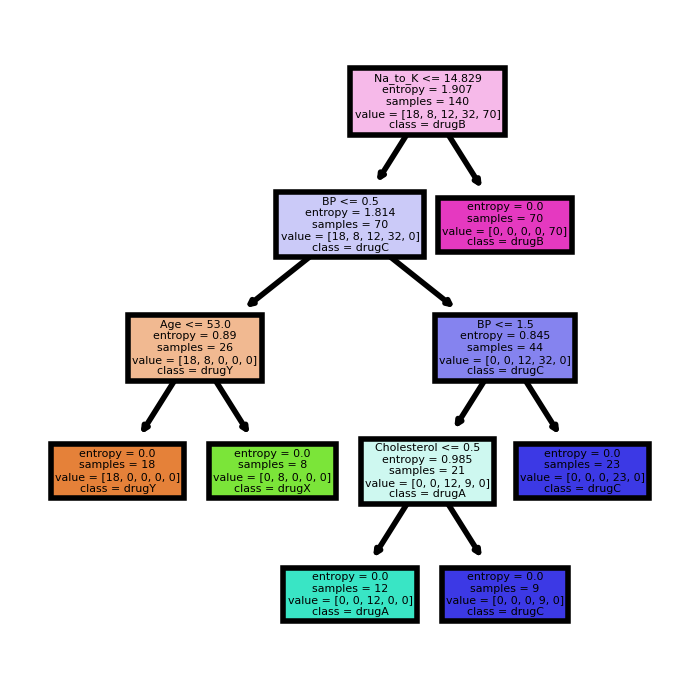

In [30]:
fn = ['Age','Sex','BP','Cholesterol','Na_to_K']
cn = ['drugY','drugX','drugA','drugC','drugB']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=400)
tree.plot_tree(model,feature_names=fn,class_names = cn, filled=True)

####Prediction on the Test data

In [31]:
preds = model.predict(x_test)

In [32]:
pd.Series(preds).value_counts()

drugX    22
drugY    21
drugA     7
drugB     6
drugC     4
dtype: int64

In [33]:
preds

array(['drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugB',
       'drugX', 'drugX', 'drugA', 'drugY', 'drugX', 'drugX', 'drugB',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugC', 'drugY',
       'drugY', 'drugB', 'drugC', 'drugY', 'drugX', 'drugX', 'drugB',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugC', 'drugA', 'drugY', 'drugY', 'drugA', 'drugA',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugX', 'drugY', 'drugX',
       'drugY', 'drugC', 'drugX', 'drugA', 'drugB', 'drugX', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugY'], dtype=object)

In [34]:
y_test

135    drugX
73     drugY
157    drugY
28     drugY
23     drugY
79     drugX
54     drugB
3      drugX
114    drugX
124    drugB
180    drugY
111    drugX
182    drugX
64     drugB
9      drugY
68     drugY
35     drugX
45     drugX
89     drugY
47     drugC
177    drugY
126    drugY
142    drugB
7      drugC
12     drugY
32     drugX
181    drugX
136    drugB
105    drugX
178    drugY
48     drugY
190    drugY
112    drugX
81     drugX
95     drugX
43     drugX
158    drugC
187    drugA
99     drugY
65     drugY
138    drugB
46     drugA
118    drugA
85     drugB
110    drugA
141    drugY
199    drugX
115    drugY
37     drugX
184    drugY
2      drugC
44     drugX
17     drugA
108    drugB
152    drugX
106    drugX
51     drugX
58     drugX
125    drugY
6      drugY
Name: Drug, dtype: object

#####Crosstab : Way to understand the two way table between predicted vs actual

In [35]:
pd.crosstab(y_test,preds)

col_0,drugA,drugB,drugC,drugX,drugY
Drug,,,,,
drugA,5,0,0,0,0
drugB,2,6,0,0,0
drugC,0,0,4,0,0
drugX,0,0,0,22,0
drugY,0,0,0,0,21


### Accuracy of the above model

In [36]:
np.mean(preds==y_test)

0.9666666666666667

In [37]:
x_test['preds']=preds

In [38]:
x_test['y_test']=y_test

In [39]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K,preds,y_test
135,74,1,1,1,11.939,drugX,drugX
73,41,0,2,1,22.905,drugY,drugY
157,53,1,1,0,22.963,drugY,drugY
28,39,0,1,1,22.697,drugY,drugY
23,48,0,1,0,15.036,drugY,drugY
79,32,0,1,1,10.840,drugX,drugX
54,68,0,0,1,10.189,drugB,drugB
3,28,0,2,0,7.798,drugX,drugX
114,20,0,2,1,9.281,drugX,drugX
124,53,0,0,1,12.495,drugA,drugB
